# Autoencoder using tensorflow
- แบบฝึกหัด จัดกลุ่มลูกค้าคล้ายๆ Kmean - Using 
- ใช้เทคนิคของ Autoencoder

เอกสารประกอบ<br>
https://www.kaggle.com/datasets/shrutimechlearn/customer-data

In [ ]:
#!pip install tensorflow # or !pip install tensorflow --upgrade

In [ ]:
#!python -m pip install tensorflow

In [2]:
# TensorFlow and tf.keras
import tensorflow as tf

# Helper libraries

import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
%config InlineBackend.figure_format='retina'
import mplcyberpunk

plt.style.use("cyberpunk")

print(tf.__version__)

2.6.0


In [3]:
df = pd.read_csv('Mall_Customers.csv')
df.sample(5)

CustomerID   Genre  Age  Annual_Income_(k$)  Spending_Score
79           80  Female   49                  54              42
107         108    Male   54                  63              46
71           72  Female   47                  49              42
153         154  Female   38                  78              76
166         167    Male   42                  86              20

In [4]:
df['female'] = np.where(df['Genre']=='Female',1,0)
df['male']   = np.where(df['Genre']=='Male',1,0)

In [156]:
X = df.drop('CustomerID',axis=1)
X = X.drop('Genre',axis=1)
X.sample(5)

Age  Annual_Income_(k$)  Spending_Score  female  male
101   49                  62              48       1     0
132   25                  72              34       1     0
11    35                  19              99       1     0
144   25                  77              12       0     1
103   26                  62              55       0     1

In [157]:
MEAN = X.mean()
STD = X.std()
X_norm = (X - MEAN)/STD

In [158]:
from sklearn.model_selection import train_test_split
X_train, X_test = train_test_split(X_norm ,test_size=0.2,random_state=101)

In [159]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Flatten,Reshape
from tensorflow.keras.optimizers import SGD

In [171]:
encoder = Sequential()
encoder.add(Flatten(input_shape=[5]))
encoder.add(Dense(200,activation="relu"))
encoder.add(Dense(100,activation="relu"))
encoder.add(Dense(50,activation="relu"))
encoder.add(Dense(25,activation="relu"))

In [172]:
decoder = Sequential()
decoder.add(Dense(25,input_shape=[25],activation='relu'))
decoder.add(Dense(50,activation='relu'))
decoder.add(Dense(100,activation='relu'))
decoder.add(Dense(200,activation='relu'))
decoder.add(Dense(5,activation='relu'))# , activation="sigmoid"
decoder.add(Reshape([5]))

In [173]:
autoencoder = Sequential([encoder, decoder])
#autoencoder.compile(loss="binary_crossentropy",optimizer=SGD(learning_rate=1.5),metrics=['accuracy'])
autoencoder.compile(loss="mse", optimizer='adam',metrics=['accuracy'])

In [174]:
autoencoder.summary()

Model: "sequential_38"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
sequential_36 (Sequential)   (None, 25)                27625     
_________________________________________________________________
sequential_37 (Sequential)   (None, 5)                 28255     
Total params: 55,880
Trainable params: 55,880
Non-trainable params: 0
_________________________________________________________________


In [175]:
autoencoder.fit(X_train, X_train, epochs=100)#,validation_data=[X_test, X_test])

Epoch 1/100
5/5 [==============================] - 1s 3ms/step - loss: 0.9903 - accuracy: 0.3000
Epoch 2/100
5/5 [==============================] - 0s 5ms/step - loss: 0.9478 - accuracy: 0.4062
Epoch 3/100
5/5 [==============================] - 0s 7ms/step - loss: 0.8711 - accuracy: 0.4250
Epoch 4/100
5/5 [==============================] - 0s 9ms/step - loss: 0.7829 - accuracy: 0.5688
Epoch 5/100
5/5 [==============================] - 0s 20ms/step - loss: 0.6833 - accuracy: 0.6562
Epoch 6/100
5/5 [==============================] - 0s 9ms/step - loss: 0.6123 - accuracy: 0.7625
Epoch 7/100
5/5 [==============================] - 0s 6ms/step - loss: 0.5650 - accuracy: 0.7688
Epoch 8/100
5/5 [==============================] - 0s 10ms/step - loss: 0.5320 - accuracy: 0.8250
Epoch 9/100
5/5 [==============================] - 0s 5ms/step - loss: 0.5154 - accuracy: 0.8625
Epoch 10/100
5/5 [==============================] - 0s 8ms/step - loss: 0.5016 - accuracy: 0.9000
Epoch 11/100
5/5 [=========

5/5 [==============================] - 0s 5ms/step - loss: 0.4732 - accuracy: 0.9750
Epoch 85/100
5/5 [==============================] - 0s 7ms/step - loss: 0.4732 - accuracy: 0.9812
Epoch 86/100
5/5 [==============================] - 0s 10ms/step - loss: 0.4732 - accuracy: 0.9750
Epoch 87/100
5/5 [==============================] - 0s 6ms/step - loss: 0.4732 - accuracy: 0.9688
Epoch 88/100
5/5 [==============================] - 0s 5ms/step - loss: 0.4732 - accuracy: 0.9688
Epoch 89/100
5/5 [==============================] - 0s 3ms/step - loss: 0.4732 - accuracy: 0.9937
Epoch 90/100
5/5 [==============================] - 0s 5ms/step - loss: 0.4732 - accuracy: 0.9812
Epoch 91/100
5/5 [==============================] - 0s 5ms/step - loss: 0.4732 - accuracy: 0.9812
Epoch 92/100
5/5 [==============================] - 0s 5ms/step - loss: 0.4732 - accuracy: 0.9750
Epoch 93/100
5/5 [==============================] - 0s 6ms/step - loss: 0.4732 - accuracy: 0.9750
Epoch 94/100
5/5 [==============

#### ลองดูผลลัพธ์

In [188]:
result = autoencoder.predict(X_train)
k = []
for i in result:
  k.append(np.argmax(i)) 

report = X_train.copy()
report['label'] = k


In [189]:
report.groupby('label').size()

label
0    29
1    17
2    26
3    46
4    42
dtype: int64

In [190]:
color = []
for i in report.label:
  if(i==0):
    color.append('red')
  elif(i==1):
    color.append('green')
  if(i==2):
    color.append('blue')
  if(i==3):
    color.append('white')
  if(i==4):
    color.append('yellow')  
report['color'] = color

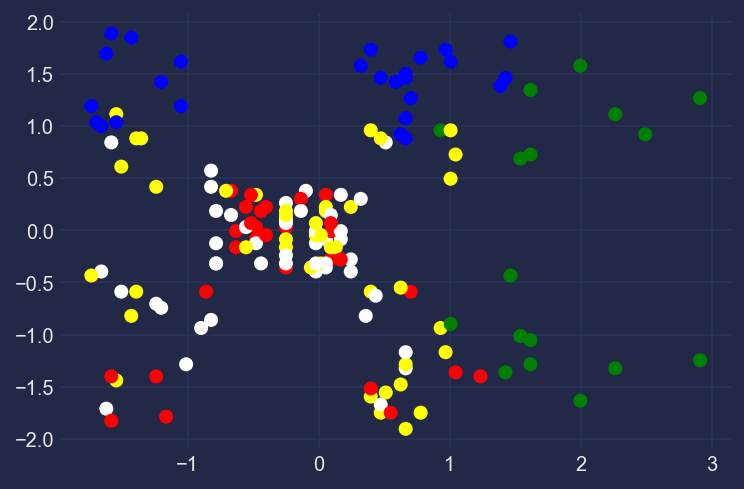

In [191]:
income = report['Annual_Income_(k$)']
spend = report['Spending_Score']
color = report['color']
plt.scatter(income,spend,color=color)

#### ทดลองทำนาย

In [182]:
result = autoencoder.predict(X_test)

In [183]:
k = []
for i in result:
  k.append(np.argmax(i)) 

In [184]:
report = X_test.copy()
report['label'] = k

In [185]:
report.groupby('label').size()

label
0     4
1     3
2    12
3    12
4     9
dtype: int64

In [186]:
color = []
for i in report.label:
  if(i==0):
    color.append('red')
  elif(i==1):
    color.append('green')
  if(i==2):
    color.append('blue')
  if(i==3):
    color.append('white')
  if(i==4):
    color.append('yellow')  
report['color'] = color

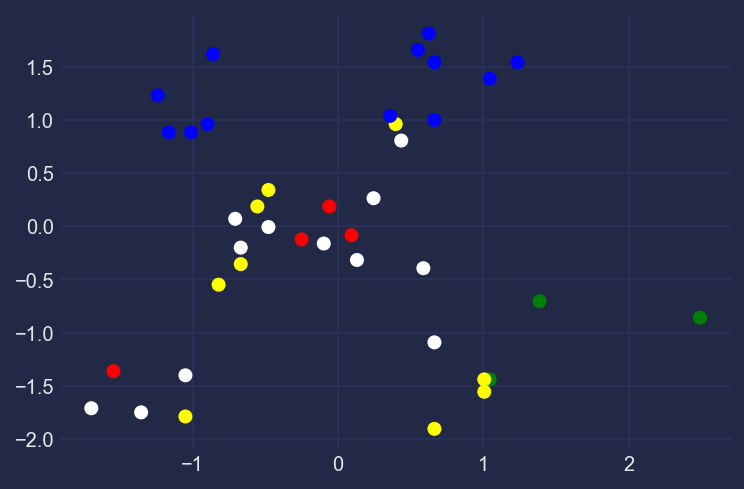

In [187]:
income = report['Annual_Income_(k$)']
spend = report['Spending_Score']
color = report['color']
plt.scatter(income,spend,color=color)